# PHYS250 assignment 4: Understanding and using Newton's Method and others for root finding


## Introduction

As we've been discussing in lectures, minimization -- thought of broadly, and perhaps more appropriately as *optimization* -- is a critical exercise in physics. 

- *Fitting a model to data:* minimize differences between a model and data
- *Second law of thermodynamics:* minimize changes in entropy for a system in thermodynamic equilibrium
- *Conservation of momentum:* establish mechanical equilibrium by minimizing changes in momentum, $\frac{d\vec{p}}{dt}=0$
- *Principle of least action:* obtain the equations of motion of a system by minimizing (or maximizing!) the variations of the action, $S$
- *Path integral formulation of quantum mechanics:* sort quantum mechanically possible trajectories by minimizing quantum action
- *Ising model:* minimization the energy of the spin configurations

One of the primary functions of minimization is to solve the equation, potentially in many dimentions $n$ and thus parameters $\{x_n\}$:

$$ F'(\{x_n\}) = 0$$

The purposes of this assignment is to gain experience with some of the standard and most effective methods for dealing with the numerical compliexities of this general task.


## Table of Contents

1. [Root finding](#rootfinding)
1. [Bisection](#bisection)
    1. [Convergence rate](#convergence)
    1. [Remarks on bisection](#bisectionremarks)
1. [Newton's Method](#newton)
    1. [Accuracy of numerical differentiation](#numericaldiff)
1. [Assignment description](#assignment)
1. Exercises:
    1. [Exercise 1: plot your functions!](#ex1)
    1. [Exercise 2: write a better bisection function](#ex2)
    1. [Exercise 3: test your functions](#ex3)
    1. [Exercise 4: compute and plot errors](#ex4)
    1. [Exercise 5: write a function that implements Newton's method](#ex5)
    1. [Exercise 6: qualitative assessment](#ex6)
    1. [Exercise 7: optional additional work](#ex7)
    1. [Exercise 8: more optional additional work](#ex7)

***

## Root finding <a class="anchor" name="rootfinding"></a>

Rootfinding is the process of solving $f(x) = 0$ for $x$.  The standard assumption is that $f : R \to R$ is _continuous_.  We are interested in developing general-purpose algorithms---those that can use $f(x)$ without needing to know many details about the function itself except that it satisfies basic generic properites of "well-behaved" functions.  When we implement our rootfinding algorithm in software, the user will pass a function or program to compute $f(x)$.  

Rootfinding methods for differentiable functions may also use the derivative $f'(x)$.

Some questions immediately arise:
* **Existence.** When does this equation have at least one solution?
* **Uniqueness.** When is the solution unique?

## Bisection <a class="anchor" name="bisection"></a>

Bisection is a rootfinding technique that starts with an interval $[a,b]$ containing a root and does not require derivatives.

As we discussed in class, the main idea behind this algorithm is to find the root of a given number $N$.

Suppose $f$ is a continuous function defined on the interval $[a,b]$, with $f(a)$ and $f(b)$ of opposite sign. We know that there exists at least one number $p$ in $(a,b)$ with $f(p)=0$. 

To find such $p$, set $a_1=a$ and $b_1=b$, and let $p_1$ be the midpoint in between a and b: 

$$p_1=\dfrac{(a_1+b_1)}{2}$$

1) If $f(p_1)=0$, then $p=p_1$, we are done;

2) If $f(p_1)$  and  $f(a_1)$ have the same sign, $p \in (p_1,b_1)$, and we set $a_2=p_1$ and $b_2=b_1$;

3) Similarly, If $f(p_1)$  and  $f(a_1)$ have opposite signs, $p \in (p_1,b_1)$, and we set $a_2=a_1$ and $b_2=p_1$;

4) Iterate the process above in the following intervals: $[a_2, b_2]$, $[a_3, b_3]$...$[a_i, b_i]$;

5) Set the error tolerance, the loop will be terminate if $$\dfrac{(a_i+b_i)}{2}< tolerance.$$


### Convergence rate <a class="anchor" name="convergence"></a>

Let's quantitatively revisit the convergence rate.  

A convergent rootfinding algorithm produces a sequence of approximations $x_i$ such that 

$$\lim_{i \to \infty} x_i \to x_*$$ 

where $f(x_*) = 0$.  

For analysis, it is convenient to define the errors $e_i = x_i - x_*$. We say that an algorithm is **$q$-linearly convergent** if 

$$\lim_{i \to \infty} |e_{i+1}| / |e_i| = \rho < 1.$$  

(The $q$ is for "quotient".)  A smaller convergence factor $\rho$ represents faster convergence.  A slightly weaker condition ($r$-linear convergence or just **linear convergence**) is that

$$ |e_i| \le \epsilon_i $$

for all sufficiently large $i$ when $\epsilon_i$ converges $q$-linearly to 0.

Which criteria does the bisection method satisfy?  What is $\rho$ for bisection?

### Remarks on bisection <a class="anchor" name="bisectionremarks"></a>

* Specifying an interval is often inconvenient
* An interval in which the function changes sign guarantees convergence (robustness)
* No derivative information is required
* Roots of even degree are problematic
* A bound on the solution error is directly available
* The convergence rate is modest -- one iteration per bit of accuracy


## Newton-Raphson Method <a class="anchor" name="newton"></a>

We discussed the more "intelligent" method of Newton in lecture. Indeed, as we discussed, much of numerical analysis here reduces to [Taylor series](https://en.wikipedia.org/wiki/Taylor_series), the approximation

$$ f(x) = f(x_0) + f'(x_0) (x-x_0) + f''(x_0) (x - x_0)^2 / 2 + \dotsb $$

centered on some reference point $x_0$.
In numerical computation, it is exceedingly rare to look beyond the first-order approximation

$$ \tilde f_{x_0}(x) = f(x_0) + f'(x_0)(x - x_0) . $$

Since $\tilde f_{x_0}(x)$ is a linear function, we can explicitly compute the unique solution of $\tilde f_{x_0}(x) = 0$ as

$$ x = x_0 - f(x_0) / f'(x_0) . $$

This is Newton's Method (aka Newton-Raphson or Newton-Raphson-Simpson) for finding the roots of differentiable functions (or twice differentiable functions in the case that $f(x) = g'(x)$ for an optimization problem).

### Accuracy of numerical differentiation <a class="anchor" name="numericaldiff"></a>

In the exercises below, you will have to perform numerical differentiation for Newton's method. Here is some discussion on that point.

#### Taylor expansion

Classical accuracy analysis assumes that functions are sufficiently smooth, meaning that derivatives exist and Taylor expansions are valid within a neighborhood.  In particular,

$$ f(x+h) = f(x) + f'(x) h + f''(x) \frac{h^2}{2!} + \underbrace{f'''(x) \frac{h^3}{3!} + \dotsb}_{O(h^3)} . $$

The big-$O$ notation is meant in the limit $h\to 0$.  Specifically, a function $g(h) \in O(h^p)$ (sometimes written $g(h) = O(h^p)$) when

there exists a constant $C$ such that

$$ g(h) \le C h^p $$

for all sufficiently *small* $h$.

**Note:** When analyzing algorithms, we will refer to cost being $O(n^2)$, for example, where $n\to \infty$.
In this case, the above definition applies for sufficiently *large* $n$.  Whether the limit is small ($h\to 0$) or large ($n \to\infty$) should be clear from context.

#### Discretization error
The `diff` and `diff_wp` functions use a "forward difference" formula: $\tilde f'(x) := (f(x+h) - f(x))/h$.
Using the Taylor expansion of $f(x+h)$, we compute the discretization error

$$ \begin{split} \frac{f(x+h) - f(x)}{h} - f'(x) &= \frac{f(x) + f'(x) h + f''(x) h^2/2 + O(h^3) - f(x)}{h} - f'(x) \\
&= \frac{f'(x) h + f''(x) h^2/2 + O(h^3)}{h} - f'(x) \\
&= f''(x) h/2 + O(h^2) .
\end{split} $$

This is the *discretization error* caused by choosing a finite (not infinitesimal) differencing parameter $h$, and the leading order term depends linearly on $h$.

#### Rounding error
We have an additional source of error, *rounding error*, which comes from not being able to compute $f(x)$ or $f(x+h)$ exactly, nor subtract them exactly.  Suppose that we can, however, compute these functions with a relative error on the order of $\epsilon_{\text{machine}}$.  This leads to

$$ \begin{split}
\tilde f(x) &= f(x)(1 + \epsilon_1) \\
\tilde f(x \oplus h) &= \tilde f((x+h)(1 + \epsilon_2)) \\
&= f((x + h)(1 + \epsilon_2))(1 + \epsilon_3) \\
&= [f(x+h) + f'(x+h)(x+h)\epsilon_2 + O(\epsilon_2^2)](1 + \epsilon_3) \\
&= f(x+h)(1 + \epsilon_3) + f'(x+h)x\epsilon_2 + O(\epsilon_{\text{machine}}^2 + \epsilon_{\text{machine}} h)
\end{split}
$$

where each $\epsilon_i$ is an independent relative error on the order of $\epsilon_{\text{machine}}$ and we have used a Taylor expansion at $x+h$ to approximate $f(x \oplus h)$.
We thus write the rounding error in the forward difference approximation as

$$ \begin{split}
\left\lvert \frac{\tilde f(x+h) \ominus \tilde f(x)}{h} - \frac{f(x+h) - f(x)}{h} \right\rvert &=
  \left\lvert \frac{f(x+h)(1 + \epsilon_3) + f'(x+h)x\epsilon_2 + O(\epsilon_{\text{machine}}^2 + \epsilon_{\text{machine}} h) - f(x)(1 + \epsilon_1) - f(x+h) + f(x)}{h} \right\rvert \\
  &\le \frac{|f(x+h)\epsilon_3| + |f'(x+h)x\epsilon_2| + |f(x)\epsilon_1| + O(\epsilon_{\text{machine}}^2 + \epsilon_{\text{machine}}h)}{h} \\
  &\le \frac{(2 \max_{[x,x+h]} |f| + \max_{[x,x+h]} |f' x| \epsilon_{\text{machine}} + O(\epsilon_{\text{machine}}^2 + \epsilon_{\text{machine}} h)}{h} \\
  &= (2\max|f| + \max|f'x|) \frac{\epsilon_{\text{machine}}}{h} + O(\epsilon_{\text{machine}}) \\
\end{split} $$

where we have assumed that $h \ge \epsilon_{\text{machine}}$.

This error becomes large (relative to $f'$ -- we are concerned with relative error after all)
* $f$ is large compared to $f'$
* $x$ is large
* $h$ is too small

#### Total error and optimal $h$

Suppose we would like to choose $h$ to minimize the combined discretization and rounding error,

$$ h^* = \arg\min_h | f''(x) h/2 | + (2\max|f| + \max|f'x|) \frac{\epsilon_{\text{machine}}}{h} $$

(dropping the higher order terms), which we can compute by differentiating with respect to $h$ and setting the result equal to zero

$$ |f''|/2 - (2\max|f| + \max|f'x|) \frac{\epsilon_{\text{machine}}}{h^2} = 0 $$

which can be rearranged as

$$ h^* = \sqrt{\frac{4\max|f| + 2\max|f'x|}{|f''|}} \sqrt{\epsilon_{\text{machine}}} .$$

Of course this formula is of little use for computing $h$ because all this is to compute $f'$, which we obviously don't know yet, much less $f''$.

However, it does have value:
* It explains why `1e-8` (i.e., $\sqrt{\epsilon_{\text{machine}}}$) is empirically found to be about optimal for well-behaved/scaled functions.
* It explains why even for the best behaved functions, our best attainable accuracy with forward differencing is $\sqrt{\epsilon_{\text{machine}}}$.
* If we have some special knowledge about the class of functions we need to differentiate, we might have bounds on these quantities and thus an ability to use this formula to improve accuracy.  Alternatively, we could run a parameter sweep to empirically choose a suitable $h$, though we would have to re-tune in response to parameter changes in the class of functions.
* If someone claims to have a simple and robust rule for computing $h$ then this formula tells us how to build a function that breaks their rule.  There are no silver bullets.
* If our numerical differentiation routine produces a poor approximation for some function that we run into in the wild, this helps us explain what happened and how to fix it.


## Assignment description <a class="anchor" name="assignment"></a>

In this assignment,  you will consider aspects of the numerical methods that we've discussed and apply slight variations and improvements on those as you work through the details of the exercises and learn the limitations that the methods have.


### Exercise 1: plot your functions! <a class="anchor" name="ex1"></a>

First, let's consider some test functions, defined here along with their derivatives which we'll use later. It is often crucial to try to *plot* functions and data (when you can). 


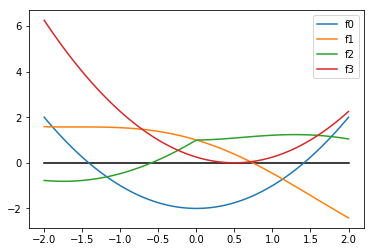

In [18]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

# Define a set of functions

def f0(x):
    return x*x - 2, 2*x

def f1(x):
    return np.cos(x) - x, -np.sin(x) - 1

def f2(x):
    # Note that this is a piecewise function, effectively
    return np.exp(-np.abs(x)) + np.sin(x), np.exp(-np.abs(x))*(-np.sign(x)) + np.cos(x)

def f3(x):
    return x*x - x + 0.25, 2*x - 1

# Make a list of these functions so that
# it is easy to iterate over

tests = (f0, f1, f2, f3)

# Define a range over which to plot these functions
x = np.linspace(-2,2,100)
plt.plot(x, 0*x, color='k')

# Iterate over the functions defined above
for f in tests:
    plt.plot(x, f(x)[0], label=f.__name__)
plt.legend(loc='upper right');

Questions for Exercise 1:

1. Which of these functions have at least one root?
1. Which have more than one root?
1. Can we determine these properties merely by evaluating $f(x)$ for some values of $x$?
1. Define a function that has more than two roots in the specified range

### Exercise 2: write a better bisection function <a class="anchor" name="ex2"></a>

We discussed an initial version of the bisection function in class, but there were sevreral shortcomings:

- The test function was hard-coded in the bisection function
- Steps of the method were not handled great and no access to intermediate results of the method (i.e. prior to convergence.
- Testing for the existence of a root was baked into the bisection function (meaning that any change in definition is hard to accommodate)

Here is that original function:


In [ ]:
def bisection(a, b, tol, max_it):
    i = 1
    fa = f(a)
    while i <= max_it:
        p = (a + b) / 2.0
        fp = f(p)
        if fp == 0 or (b - a) < tol:
            p_out = p
            print("Number of iterations = " + str(i))
            return(p)
        i += 1
        if fa * fp > 0:
            a = p
            fa = fp
        else:
            b = p
    print('max num iteration exceeded')
    return(-999)

Questions for Exercise 2:

1. Write a `hasroot` function to determine if a user-defined function has a root in the specified interval
1. Write a new `bisection` function that overcomes these issues by
   1. Take a user defined function as an argument
   1. Provide an array as an input that can hold the iterations of the methods
   1. Perform a truly *iterative* method by calling *itself* in the case that additional iterations are required

Suggestions:

Create a `hasroot` function:

~~~~
def hasroot(f, a, b):
    '''
    This function provides a test to determine if a root exists for function `f` in range `a` to `b`
    '''
    return <RESULT OF TEST>
~~~~

In [20]:
def hasroot(f, a, b):
    return f(a)[0]*f(b)[0] < 0
    
def bisect(f, a, b, history=None):
    mid = (a + b)/2.
    if b-a < 1e-5:
        if history is None:
            return mid
        else:
            return mid, np.array(history)
    if history is not None:
        history.append(mid)
    if hasroot(f, a, mid):
        return bisect(f, a, mid, history)
    else:
        return bisect(f, mid, b, history)

In [21]:
bisect(tests[0], -1, 1)

0.9999961853027344

### Exercise 3: perform tests of your bisection function <a class="anchor" name="ex3"></a>

Test the accuracy of your `bisection` function by comparing your implementation to the native calculations in `numpy`.

For example:

~~~~    
np.sqrt(2) - bisection(f0, 0, 2)
~~~~

Questions for exercise 3:

1. What is the accuracy of the `bisection` function for various user-defined input functions
1. How many iterations are required for various functions?

In [25]:
np.sqrt(2) - bisect(tests[0], 0, 2)

2.2891797357704746e-06

In [26]:
x, h = bisect(tests[0], 0, 2, history=[])
x, h.tolist()

(1.4142112731933594,
 [1.0,
  1.5,
  1.25,
  1.375,
  1.4375,
  1.40625,
  1.421875,
  1.4140625,
  1.41796875,
  1.416015625,
  1.4150390625,
  1.41455078125,
  1.414306640625,
  1.4141845703125,
  1.41424560546875,
  1.414215087890625,
  1.4141998291015625,
  1.4142074584960938])

### Exercise 4: compute and plot errors <a class="anchor" name="ex4"></a>

In this exercise, you should graphically represent the error between your approximation and the "true" answer.

Questions for exercise 4:

1. Compute errors for each of your functions as a function of the iteration number
1. Plot the errors as a function of that iteration number

Suggestions:

1. Use the history list that you've built into the `bisection` function
1. Plot this as a `semilogy` plot of error vs. iteration number

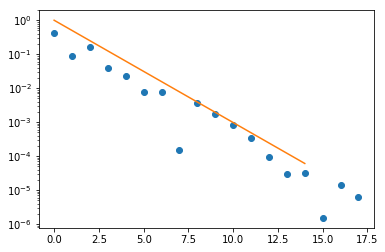

In [27]:
# Compute and plot errors
err = h - np.sqrt(2)
plt.semilogy(np.abs(err), 'o')
plt.semilogy(.5**np.arange(15));

### Exercise 5: write a function that implements Newton's method <a class="anchor" name="ex5"></a>

We discussed an example in lecture (in the Examples folder in GitHub: https://github.com/UChicagoPhysics/PHYS250/tree/master/Examples).

However, this function had a few shortcomings that you should now fix.

Questions for exercise 5:

1. Instead of using a built-in library for computing the derivative of the function `f(x)`, `f'(x)`, I want you to compute it yourself.
1. Place a tolerance on the computation of the derivative of this function in addition to the convergence of the method itself.
1. Protect against division by zero


In [28]:
def newton(f, x, verbose=False):
    for i in range(100):
        fx, dfx = f(x)
        if verbose:
            print(f.__name__, i, x, fx)
        if np.abs(fx) < 1e-12:
            return x, fx, i
        try:
            x -= fx / dfx
        except ZeroDivisionError:
            return x, np.NaN, i

for f in tests:
    print(f.__name__, newton(f, 1))

('f0', None)
('f1', (0.7390851332151606, 1.1102230246251565e-16, 4))
('f2', (-6.285049273382587, -1.4268100589909238e-16, 4))
('f3', (0.5000009536743164, 9.094947017729282e-13, 19))


### Exercise 6: qualitative assessment  <a class="anchor" name="ex6"></a>

Questions for exercise 6:

* Did we solve all of these equations?
* How can the iteration break down?
* Does choosing a different initial guess lead to different solutions?
* How is this convergence test different from the one we used for bisection?
* Is the convergence rate similar for all test equations?

### Exercise 7: optional additional work   <a class="anchor" name="ex7"></a>

As you did for the last exercise, you often want to apply Newton's method to a function that we know how to evaluate, but don't have code to differentiate. This is because it's frequently difficult/error-prone to write or because the interface by which we call it does not support derivatives.  (Commercial packages often fall in this category.)

Expand upong your default implementation of a numerical derivative above by using the Walker and Pernice (1998) choice of step:

* "NITSOL: A Newton iterative solver for nonlinear systems:" https://www.osti.gov/biblio/433349

This algorithm is imperfect, leaving some scaling responsibility to the user. It is the default in PETSc's "matrix-free" Newton-type solvers.

### Exercise 8: more optional additional work   <a class="anchor" name="ex8"></a>

Expand beyond 1 dimension!